In [187]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [182]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [183]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [205]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

Found 222 images belonging to 9 classes.
Found 90 images belonging to 9 classes.


In [193]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs=10,
        validation_data=test_generator,
        validation_steps=6)

Epoch 1/10
10/10 [==============================] - 41s 4s/step - loss: 0.0759 - acc: 0.9779 - val_loss: 0.9289 - val_acc: 0.8333
Epoch 2/10
10/10 [==============================] - 38s 4s/step - loss: 0.0750 - acc: 0.9775 - val_loss: 1.1919 - val_acc: 0.8000
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 0.0846 - acc: 0.9650 - val_loss: 0.8852 - val_acc: 0.8556
Epoch 4/10
10/10 [==============================] - 35s 4s/step - loss: 0.1588 - acc: 0.9429 - val_loss: 1.3789 - val_acc: 0.8000
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 0.1062 - acc: 0.9687 - val_loss: 1.0416 - val_acc: 0.8111
Epoch 6/10
10/10 [==============================] - 35s 4s/step - loss: 0.0955 - acc: 0.9687 - val_loss: 0.8633 - val_acc: 0.8444
Epoch 7/10
10/10 [==============================] - 33s 3s/step - loss: 0.0456 - acc: 0.9810 - val_loss: 1.2986 - val_acc: 0.8111
Epoch 8/10
10/10 [==============================] - 33s 3s/step - loss: 0.1233 - acc: 0.95

In [171]:
test_image = image.load_img('image.jpeg', target_size=(300, 300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

In [186]:
model.save('model.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


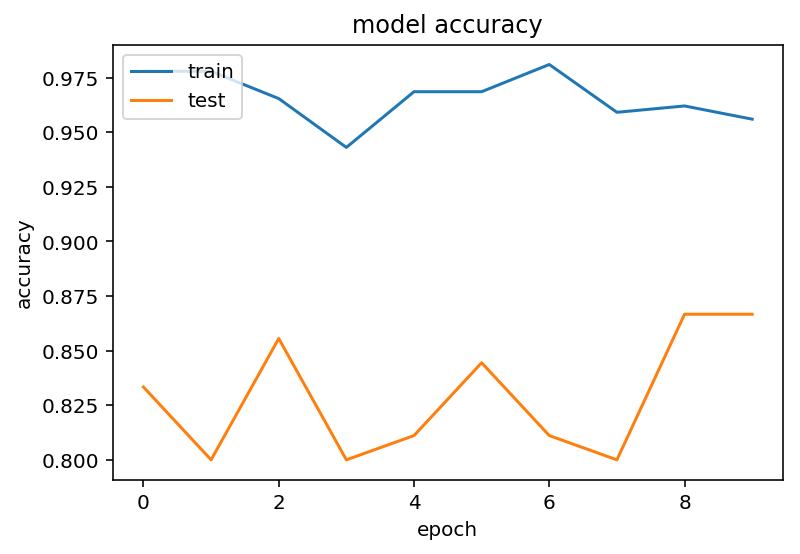

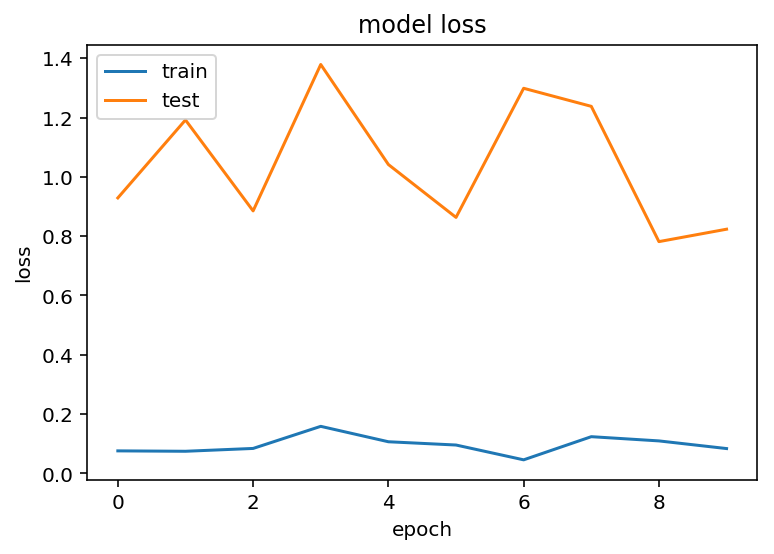

In [194]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()